# MXNet (From Scratch)

In [1]:
import mxnet as mx
from mxnet import nd
import matplotlib.pyplot as plt

ctx = mx.gpu()

# Understanding Deconvolution

## Getting the data

In [2]:
mnist = mx.gluon.data.vision.MNIST()

(28, 28)


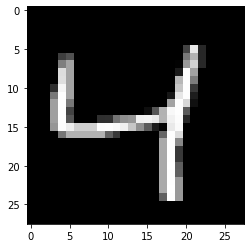

In [3]:
image, _ = mnist[2]

image = image.flatten().astype('float32')

print(image.shape)

plt.imshow(image.asnumpy(), cmap = 'gray')
plt.show()

In [4]:
def deconvolution_with_strides(image, kernel, strides):
    filter_hight, filter_width = kernel.shape
    hight = ((image.shape[0] - 1) * strides[0]) + filter_hight
    width = ((image.shape[1] - 1) * strides[1]) + filter_width
    layer = nd.zeros((int(hight), int(width)))

    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            layer[(i * strides[0]): (i * strides[0]) + filter_hight, (j * strides[1]) : (j * strides[1]) + filter_width] += image[i, j] * kernel
    return layer

## Below we are using strides as (1, 1) which is basically what we did in last notebook of deconvolution.

So strides (1, 1) is default, hence no change in the output shape

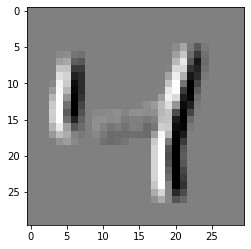

(30, 30)

In [5]:
kernal = nd.array([[1.0, 0.0, -1.0],
                   [1.0, 0.0, -1.0],
                   [1.0, 0.0, -1.0]])

output = deconvolution_with_strides(image, kernal, (1, 1))

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape

## Ok, now let's use strides (2, 2)

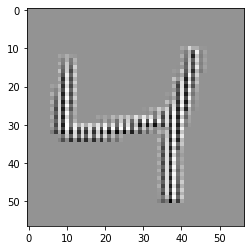

(57, 57)

In [6]:
kernal = nd.random.normal(0, 1, (3, 3))

output = deconvolution_with_strides(image, kernal, (2, 2))

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape # note the output shape

## Lets see some more examples with different types of filters with stides (3, 3)

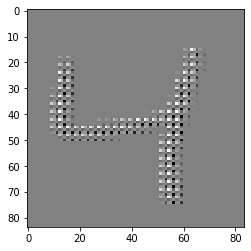

(84, 84)

In [7]:
kernal = nd.random.normal(0, 1, (3, 3))

output = deconvolution_with_strides(image, kernal, (3, 3))

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape

## Time to check out a 5 by 5 random filter with strides (3, 3)

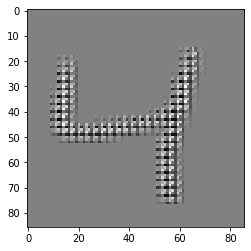

(86, 86)

In [8]:
kernal = nd.random.normal(0, 1, (5, 5))

output = deconvolution_with_strides(image, kernal, (3, 3))

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape

## Lets try one more time with kernel of shape (5, 5) with strides (4, 4)

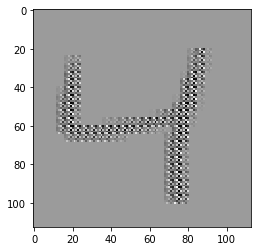

(113, 113)

In [9]:
kernal = nd.random.normal(0, 1, (5, 5))

output = deconvolution_with_strides(image, kernal, (4, 4))

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape

## Lets try 7 by 7 this time with strides (3, 3)

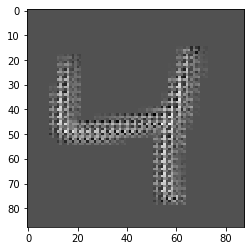

(88, 88)

In [10]:
kernal = nd.random.normal(0, 1, (7, 7))

output = deconvolution_with_strides(image, kernal, (3, 3))

plt.imshow(output.asnumpy(), cmap = 'gray')
plt.show()

output.shape